In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

df = pd.read_csv("http://www.mosaic-web.org/go/datasets/galton.csv")
print('This is the famous Galton Height Data collection set of adult heights and their parents heights from 1850\'s')
print(df.head(4))


This is the famous Galton Height Data collection set of adult heights and their parents heights from 1850's
  family  father  mother sex  height  nkids
0      1    78.5    67.0   M    73.2      4
1      1    78.5    67.0   F    69.2      4
2      1    78.5    67.0   F    69.0      4
3      1    78.5    67.0   F    69.0      4


In [2]:
print(df.describe(), "\n")
print(df.describe()['height']) #note df.describe() returns a data frame, can access columns individually by name


           father      mother      height       nkids
count  898.000000  898.000000  898.000000  898.000000
mean    69.232851   64.084410   66.760690    6.135857
std      2.470256    2.307025    3.582918    2.685156
min     62.000000   58.000000   56.000000    1.000000
25%     68.000000   63.000000   64.000000    4.000000
50%     69.000000   64.000000   66.500000    6.000000
75%     71.000000   65.500000   69.700000    8.000000
max     78.500000   70.500000   79.000000   15.000000 

count    898.000000
mean      66.760690
std        3.582918
min       56.000000
25%       64.000000
50%       66.500000
75%       69.700000
max       79.000000
Name: height, dtype: float64


In [3]:
# lets look at the percentiles 
num_records = len(df)
mu = df.height.mean()
sigma = df.height.std()
q1, q3 = np.percentile(df.height, [25, 75]) # get the values where 25% of data is below this and 75% is below this
iqr = q3 - q1                               # inter - quartile range
lower_bound = q1 - (iqr * 1.5)              # tukey outlier lower limit which is the mean value - 1.5 * iqr
upper_bound = q3 + (iqr * 1.5)              # tukey outlier upper limit which is the mean value + 1.5 * iqr
#  print(mu, sigma, q1, q3, iqr, lower_bound, upper_bound)

mean height 66.761
std height 3.583
Quartile 1 64.00
Quartile 3 69.70
Inter Quartile Range 5.70
Tukey Limit Boundaries Lower: 55.450 Upper: 78.250
+/- 0 std: 66.761-66.761 num_records 0 percentage 0.000
+/- 1 std: 63.178-70.344 num_records 560 percentage 0.624
+/- 2 std: 59.595-73.927 num_records 876 percentage 0.976
+/- 3 std: 56.012-77.509 num_records 895 percentage 0.997


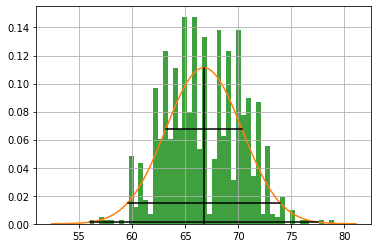

In [4]:
print('mean height %.3f' % mu)
print('std height %.3f' % (sigma))
print('Quartile 1 %.2f' % q1)
print('Quartile 3 %.2f' % q3)
print('Inter Quartile Range %.2f' % iqr)
print('Tukey Limit Boundaries Lower: %.3f Upper: %.3f' % (lower_bound, upper_bound))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)    # set up a 100 linear spaced values between +/-4 std's of mean
n, bins, patches = plt.hist(df.height, 50, density=1, facecolor='green', alpha=0.75)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot([mu, mu], [0, stats.norm.pdf(mu, mu, sigma)], 'k')
for i in range(0,4):
    lower = mu - i*sigma
    upper = mu + i*sigma
    record_count = len(df[(df.height>=lower) & (df.height<=upper)])  # number of elements in the range
    print('+/- %d std: %.3f-%.3f num_records %d percentage %.3f' % (i, lower, upper, record_count, record_count/num_records))
    plt.plot([lower, upper], [stats.norm.pdf(lower, mu, sigma), stats.norm.pdf(upper, mu, sigma) ], 'k')
    
plt.grid(True)
plt.show()

In [5]:
print('Avg height %.3f inches: %.3f %.3f' % (mu, stats.norm.pdf(mu, mu, sigma), 1-stats.norm.pdf(mu, mu, sigma)))
print('my height 74 inches: %.5f' % (stats.norm.pdf(74, mu, sigma)))
print('Taller then %.5f%%' % stats.percentileofscore(df.height, 74, kind='rank'))


Avg height 66.761 inches: 0.111 0.889
my height 74 inches: 0.01446
Taller then 98.66370%


In [6]:
# separate the 2 modes of the data
df_m = df[df['sex']=='M']
#df_m.info()
df_m.describe()['height']

count    465.000000
mean      69.228817
std        2.631594
min       60.000000
25%       67.500000
50%       69.200000
75%       71.000000
max       79.000000
Name: height, dtype: float64

In [7]:
df_w = df[df['sex']=='F']
df_w.describe()['height']

count    433.000000
mean      64.110162
std        2.370320
min       56.000000
25%       62.500000
50%       64.000000
75%       65.500000
max       70.500000
Name: height, dtype: float64

In [8]:
def outliers_z_score(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.where(np.abs(z_scores) > threshold)
